## Delivery Duration Prediction

#### Download Datasets
This data project has been used as a take-home assignment in the recruitment process for the data science positions at DoorDash.

#### Assignment
When a consumer places an order on DoorDash, we show the expected time of delivery. It is very important for DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the estimated time taken for a delivery.

Concretely, for a given delivery you must predict the total delivery duration seconds , i.e., the time taken from

- Start: the time consumer submits the order (created_at) to
- End: when the order will be delivered to the consumer (actual_delivery_time)

#### Data Description
The attached file historical_data.csv contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. We have added noise to the dataset to obfuscate certain business details. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds

The target value to predict here is the total seconds value between created_at and actual_delivery_time.

Columns in historical_data.csv

#### Time features

- market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
- created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)
- actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer

#### Store features

- store_id: an id representing the restaurant the order was submitted for
- store_primary_category: cuisine category of the restaurant, e.g., italian, asian
- order_protocol: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol

#### Order features

- total_items: total number of items in the order
- subtotal: total value of the order submitted (in cents)
- num_distinct_items: number of distinct items included in the order
- min_item_price: price of the item with the least cost in the order (in cents)
- max_item_price: price of the item with the highest cost in the order (in cents)

#### Market features

DoorDash being a marketplace, we have information on the state of marketplace when the order is placed, that can be used to estimate delivery time. The following features are values at the time of created_at (order submission time):

- total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation
- total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order
- total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.
Predictions from other models

We have predictions from other models for various stages of delivery process that we can use:

- estimated_order_place_duration: Estimated time for the restaurant to receive the order from DoorDash (in seconds)
- estimated_store_to_consumer_driving_duration: Estimated travel time between store and consumer (in seconds)

#### Practicalities
Build a model to predict the total delivery duration seconds (as defined above). Feel free to generate additional features from the given data to improve model performance. Explain:

- model(s) used,
- how you evaluated your model performance on the historical data,
- any data processing you performed on the data,
- feature engineering choices you made,
- other information you would like to share your modeling approach.

We expect the project to take 3-5 hours in total, but feel free to spend as much time as you like on it. Feel free to use any open source packages for the task.

### Loading required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path
import os

In [8]:
# Loading data from a zip file

tarball_path = Path(r'C:\Users\Daman\OneDrive\Desktop\Business Projects\DoorDash - Delivery Duration Prediction - Trial 2\Datasets')


# Creating a folder for extracting data from zipfile


# Extracting data from zipfile

# Loading the data


zip_path = Path(r'C:\Users\Daman\OneDrive\Desktop\Business Projects\DoorDash - Delivery Duration Prediction - Trial 2\datasets')
extract_path = Path(r'C:\Users\Daman\OneDrive\Desktop\Business Projects\DoorDash - Delivery Duration Prediction - Trial 2')

with zipfile.ZipFile(zip_path, 'r') as zip_f:
    zip_f.extractall(extract_path)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Daman\\OneDrive\\Desktop\\Business Projects\\DoorDash - Delivery Duration Prediction - Trial 2\\datasets'

In [7]:
# Define paths
zip_file_path = Path(r'C:\Users\Daman\OneDrive\Desktop\Business Projects\DoorDash - Delivery Duration Prediction - Trial 2\Datasets')  # Change to your zip file path
extract_folder = Path('datasets')

# Create a folder for extracting data if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract data from zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    # print(f'Extracted files: {zip_ref.namelist()}')

# # Load the extracted data (assuming CSV files inside the zip)
# for file_name in os.listdir(extract_folder):
#     if file_name.endswith('.csv'):
#         file_path = os.path.join(extract_folder, file_name)
#         df = pd.read_csv(file_path)
#         print(f'Loaded {file_name} with shape {df.shape}')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Daman\\OneDrive\\Desktop\\Business Projects\\DoorDash - Delivery Duration Prediction - Trial 2\\Datasets'

In [4]:
# Reading csv file and creating DataFrame

df = pd.read_csv('datasets/historical_data.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


### Performing EDA analysis

In [5]:
df.shape

(197428, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

#### Insights:
1. There are columns with null values.
2. D types for some time columns need to be corrected 

#### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train, df_test = train_test_split(df, test_size= 0.2, random_state=42, shuffle=True)

In [10]:
print(df_train.shape)
print(df_test.shape)

(157942, 16)
(39486, 16)


In [11]:
df_eda = df_train.copy()

### EDA

In [12]:
df_eda.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,157149.000000,157942,157936,157942.000000,154113,157139.000000,157942.000000,157942.000000,157942.000000,157942.000000,157942.000000,144915.000000,144915.000000,144915.000000,157942.000000,157517.000000
unique,NaN,147240,145302,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-16 01:48:11,2015-02-16 03:51:49,NaN,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,5,NaN,15577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978536,NaN,NaN,3529.812286,NaN,2.882365,3.198041,2681.222525,2.670271,685.864596,1159.444727,44.717910,41.654894,57.916896,308.559256,544.803316
std,1.526525,NaN,NaN,2054.917711,NaN,1.503399,2.708787,1820.229122,1.629788,522.856699,560.671380,34.478184,32.095486,52.591200,90.336609,219.192430
min,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,-52.000000,0.000000,-3.000000,-4.000000,-6.000000,0.000000,0.000000
25%,2.000000,NaN,NaN,1686.000000,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,381.000000
50%,3.000000,NaN,NaN,3581.000000,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,543.000000
75%,4.000000,NaN,NaN,5300.000000,NaN,4.000000,4.000000,3395.000000,3.000000,945.000000,1395.000000,65.000000,62.000000,84.000000,446.000000,702.000000


In [13]:
df_eda[df_eda['estimated_store_to_consumer_driving_duration'] == 0].shape

(6, 16)

### Insights:

- Negative dashers, orders to be deleted
- Zero time features to be looked up further

In [14]:
df_eda['market_id'].value_counts()

market_id
2.0    44101
4.0    37911
1.0    30468
3.0    18606
5.0    14436
6.0    11627
Name: count, dtype: int64

In [15]:
df_eda['store_id'].value_counts()

store_id
6865    739
1311    709
314     661
1686    604
3937    561
       ... 
4346      1
837       1
4350      1
5737      1
2514      1
Name: count, Length: 6617, dtype: int64

- store_id doesn't seem that useful, can be removed. Can use for imputing some store related blank features.

In [16]:
df_eda['store_primary_category'].value_counts()[50:]

store_primary_category
pakistani            114
ethiopian            111
british              111
afghan                89
malaysian             80
soup                  60
argentine             59
german                51
gluten-free           49
kosher                40
irish                 40
spanish               30
comfort-food          22
singaporean           22
cheese                19
moroccan              18
european              15
russian               15
african               10
lebanese               9
indonesian             2
belgian                2
alcohol-plus-food      1
chocolate              1
Name: count, dtype: int64

- May be some store categories with lesser counts (less than 100) can be set to 'Speciality'. Check for existing Other and NA values

In [17]:
df_eda['order_protocol'].value_counts()

order_protocol
1.0    43747
3.0    42516
5.0    35366
2.0    19283
4.0    15568
6.0      644
7.0       15
Name: count, dtype: int64

<Axes: >

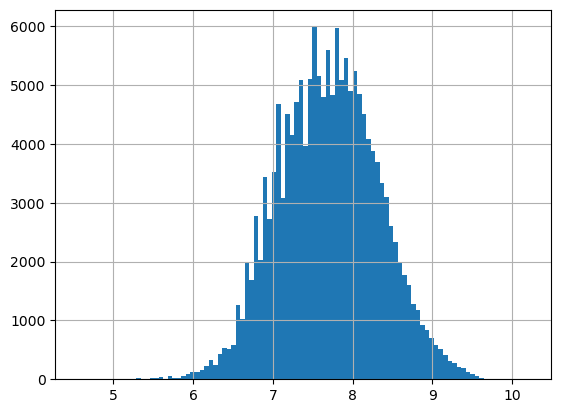

In [18]:
df_eda['subtotal'][df_eda['subtotal'] != 0].apply(np.log).hist(bins=100)

- Good to have 'subtotal' log transformed

In [19]:
np.percentile(df_eda['total_items'], 99.7)

18.0

- remove outliers from total items

<Axes: >

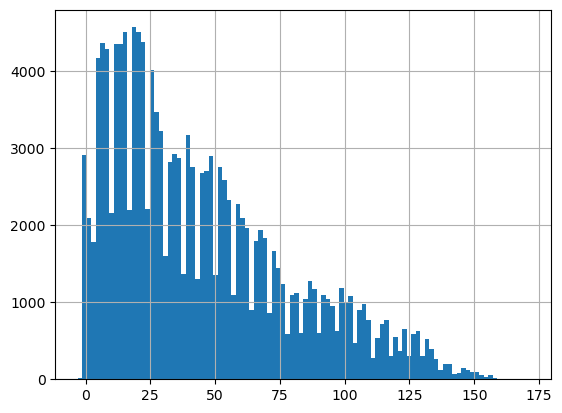

In [20]:
df_eda['total_onshift_dashers'].hist(bins=100)

<Axes: >

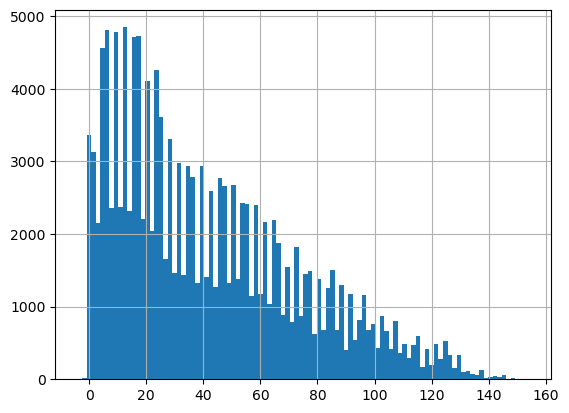

In [21]:
df_eda['total_busy_dashers'].hist(bins=100)

<Axes: >

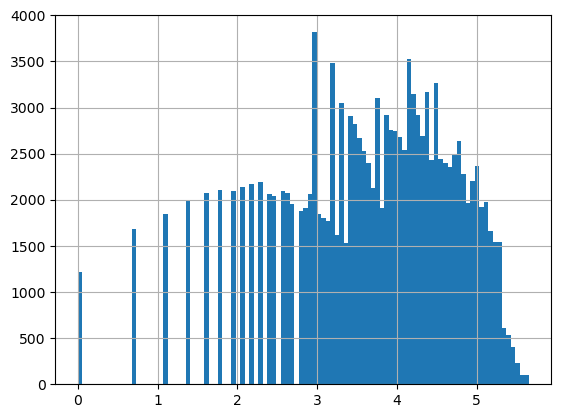

In [22]:
df_eda['total_outstanding_orders'][df_eda['total_outstanding_orders'] > 0].apply(np.log).hist(bins=100)

### Preparing Data for ML

In [23]:
df_train

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
178523,3.0,2015-02-10 02:25:28,2015-02-10 03:09:01,1659,hawaiian,2.0,2,1298,2,399,899,0.0,0.0,0.0,251,821.0
89414,4.0,2015-01-23 04:23:13,2015-01-23 05:01:12,3748,mediterranean,2.0,2,1690,2,795,895,78.0,64.0,75.0,251,406.0
94190,1.0,2015-01-24 03:33:32,2015-01-24 04:03:35,6750,italian,1.0,2,3300,2,1150,1450,63.0,66.0,90.0,446,296.0
136117,5.0,2015-02-17 00:25:38,2015-02-17 01:14:22,6456,american,1.0,1,3029,1,3029,3029,23.0,15.0,15.0,446,773.0
53337,4.0,2015-01-26 01:19:16,2015-01-26 02:24:02,6889,dessert,1.0,2,3390,2,1695,1695,71.0,98.0,91.0,446,758.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2.0,2015-01-25 23:30:50,2015-01-26 00:12:09,4937,NaN,1.0,4,5115,4,565,2175,56.0,69.0,66.0,446,292.0
103694,3.0,2015-02-02 20:09:05,2015-02-02 21:25:29,386,chinese,2.0,3,4225,3,975,1025,50.0,51.0,62.0,251,833.0
131932,2.0,2015-02-16 20:27:22,2015-02-16 21:01:46,2687,chinese,3.0,2,1790,2,895,895,51.0,49.0,78.0,251,656.0
146867,4.0,2015-01-25 04:05:02,2015-01-25 04:43:45,3646,peruvian,3.0,1,1400,1,1400,1400,38.0,64.0,81.0,251,326.0


In [24]:
df_train['created_at'] = pd.to_datetime(df_train['created_at'])
df_train['actual_delivery_time'] = pd.to_datetime(df_train['actual_delivery_time'])

In [25]:
df_train['estimated_order_place_duration'] = df_train['estimated_order_place_duration'].astype('float64')

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157942 entries, 178523 to 121958
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     157149 non-null  float64       
 1   created_at                                    157942 non-null  datetime64[ns]
 2   actual_delivery_time                          157936 non-null  datetime64[ns]
 3   store_id                                      157942 non-null  int64         
 4   store_primary_category                        154113 non-null  object        
 5   order_protocol                                157139 non-null  float64       
 6   total_items                                   157942 non-null  int64         
 7   subtotal                                      157942 non-null  int64         
 8   num_distinct_items                            157942 n

In [27]:
df_train['delivery_time_seconds'] = (df_train['actual_delivery_time'] - df_train['created_at']).dt.total_seconds()


In [28]:
df_train['order_prep_seconds'] = df_train['delivery_time_seconds'] - df_train['estimated_store_to_consumer_driving_duration'] - df_train['estimated_order_place_duration']


In [29]:
df_train['actual_delivery_time_pacific'] = (df_train['actual_delivery_time'].dt.tz_localize('UTC')).dt.tz_convert('US/Pacific')
df_train['created_at_pacific'] = (df_train['created_at'].dt.tz_localize('UTC')).dt.tz_convert('US/Pacific')

In [30]:
df_train = df_train[df_train['order_prep_seconds'] > 0]

In [31]:
df_train = df_train[~(df_train['total_onshift_dashers'] < 0)]
df_train = df_train[~(df_train['total_busy_dashers'] < 0)]
df_train = df_train[~(df_train['total_outstanding_orders'] < 0)]

In [32]:
df_train[(df_train['market_id'].isna()) & (~(df_train['store_id'].isna()))].shape

(791, 20)

In [33]:
df_train[(df_train['store_id'] == 4) & ~(df_train['market_id'] == 1.0)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds,actual_delivery_time_pacific,created_at_pacific
108566,2.0,2015-02-17 18:41:35,2015-02-17 19:38:38,4,italian,4.0,5,4173,4,620,870,14.0,11.0,17.0,251.0,644.0,3423.0,2528.0,2015-02-17 11:38:38-08:00,2015-02-17 10:41:35-08:00
108692,NaN,2015-01-28 22:27:10,2015-01-28 23:39:14,4,NaN,NaN,1,799,1,639,639,16.0,12.0,11.0,251.0,880.0,4324.0,3193.0,2015-01-28 15:39:14-08:00,2015-01-28 14:27:10-08:00
108526,4.0,2015-01-28 23:45:29,2015-01-29 00:42:51,4,italian,5.0,2,937,1,369,369,7.0,8.0,14.0,251.0,388.0,3442.0,2803.0,2015-01-28 16:42:51-08:00,2015-01-28 15:45:29-08:00
108676,6.0,2015-02-08 04:37:17,2015-02-08 05:23:53,4,fast,1.0,6,2995,2,422,548,40.0,46.0,62.0,251.0,548.0,2796.0,1997.0,2015-02-07 21:23:53-08:00,2015-02-07 20:37:17-08:00
108814,NaN,2015-02-03 03:10:12,2015-02-03 04:12:33,4,NaN,NaN,3,1003,3,145,499,43.0,45.0,79.0,251.0,432.0,3741.0,3058.0,2015-02-02 20:12:33-08:00,2015-02-02 19:10:12-08:00


In [34]:

df_check = df_train.copy()

inconsistent_store_ids = (
    df_check.groupby('store_id')['market_id']
    .apply(lambda x: x.nunique() > 1)  # Check if there is more than 1 unique market_id
    .loc[lambda x: x].index.tolist()  # Get store_ids with inconsistencies
)

# Print results
if inconsistent_store_ids:
    print(f"These store_ids have inconsistent market_ids: {inconsistent_store_ids}")
else:
    print("All store_ids have consistent market_ids.")

These store_ids have inconsistent market_ids: [4, 16, 17, 19, 21, 25, 29, 32, 33, 37, 41, 46, 48, 54, 55, 58, 61, 62, 65, 70, 72, 75, 77, 83, 84, 85, 86, 88, 90, 94, 97, 99, 102, 104, 114, 115, 117, 118, 122, 124, 129, 132, 133, 140, 145, 147, 151, 153, 157, 158, 160, 161, 162, 163, 166, 169, 174, 175, 176, 186, 191, 192, 193, 195, 197, 199, 201, 202, 205, 207, 208, 210, 216, 217, 220, 221, 226, 228, 230, 232, 235, 239, 240, 241, 245, 249, 252, 254, 257, 260, 265, 266, 269, 271, 274, 278, 282, 287, 291, 293, 294, 295, 298, 299, 300, 305, 306, 307, 308, 314, 316, 317, 319, 321, 323, 324, 326, 328, 333, 334, 337, 347, 348, 354, 355, 356, 357, 358, 369, 370, 371, 377, 379, 384, 385, 386, 389, 390, 397, 398, 399, 400, 403, 404, 405, 406, 407, 408, 410, 411, 412, 415, 416, 419, 422, 425, 426, 429, 432, 433, 437, 439, 440, 441, 446, 459, 460, 461, 462, 464, 468, 472, 476, 480, 484, 485, 488, 493, 496, 500, 501, 504, 507, 514, 515, 517, 518, 519, 523, 526, 528, 532, 533, 534, 538, 540, 542, 5

In [35]:
df_train_idx_prim = df_train[df_train['store_primary_category'].isna()].index

In [36]:
df_train_check3 = df_train.copy()


pd.DataFrame(df_train_check3.groupby('store_id')['store_primary_category'])

,0,1
0,1,175619 mexican 175614 mexican 175617 ...
1,2,135648 japanese 135651 japanese 135647 ...
2,3,187507 salad 187505 salad Name: store_pr...
3,4,108562 fast 108530 fast 108792 fast 1...
4,5,"159404 cafe Name: store_primary_category, d..."
...,...,...
6605,6983,153314 vietnamese 153311 vietnamese 1533...
6606,6984,165000 NaN 164997 NaN 164998 NaN 1649...
6607,6985,119431 latin-american 119432 latin-ameri...
6608,6986,24762 fast 25614 fast 25631 fas...


In [37]:
df_train[df_train['store_id'] == 6984]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds,actual_delivery_time_pacific,created_at_pacific
165000,6.0,2015-02-07 00:12:54,2015-02-07 00:44:31,6984,NaN,1.0,1,750,1,750,750,NaN,NaN,NaN,446.0,971.0,1897.0,480.0,2015-02-06 16:44:31-08:00,2015-02-06 16:12:54-08:00
164997,6.0,2015-01-31 02:49:56,2015-01-31 03:46:54,6984,NaN,1.0,7,4920,6,495,1095,NaN,NaN,NaN,446.0,934.0,3418.0,2038.0,2015-01-30 19:46:54-08:00,2015-01-30 18:49:56-08:00
164998,6.0,2015-02-16 02:25:50,2015-02-16 03:41:44,6984,NaN,1.0,5,3650,4,550,950,NaN,NaN,NaN,446.0,745.0,4554.0,3363.0,2015-02-15 19:41:44-08:00,2015-02-15 18:25:50-08:00
164999,6.0,2015-02-17 22:49:00,2015-02-17 23:51:18,6984,NaN,1.0,5,3030,4,450,1095,NaN,NaN,NaN,446.0,1338.0,3738.0,1954.0,2015-02-17 15:51:18-08:00,2015-02-17 14:49:00-08:00


In [42]:
# Compute the most frequent store_primary_category for each store_id

df_train_mode = df_train[~(df_train['store_primary_category'].isna())][['store_id', 'store_primary_category']]

df_train_lookup = df_train_mode.groupby('store_id')['store_primary_category'] \
    .agg(lambda x: x.mode()).reset_index()

# Add it back as a column in the original DataFrame
df_train_merged = pd.merge(df_train, df_train_lookup, on='store_id', how='left' ,suffixes=('', '_lookup'))

# Result
print(df_train_merged)


        market_id          created_at actual_delivery_time  store_id  \
0             3.0 2015-02-10 02:25:28  2015-02-10 03:09:01      1659   
1             4.0 2015-01-23 04:23:13  2015-01-23 05:01:12      3748   
2             1.0 2015-01-24 03:33:32  2015-01-24 04:03:35      6750   
3             5.0 2015-02-17 00:25:38  2015-02-17 01:14:22      6456   
4             4.0 2015-01-26 01:19:16  2015-01-26 02:24:02      6889   
...           ...                 ...                  ...       ...   
157387        2.0 2015-01-25 23:30:50  2015-01-26 00:12:09      4937   
157388        3.0 2015-02-02 20:09:05  2015-02-02 21:25:29       386   
157389        2.0 2015-02-16 20:27:22  2015-02-16 21:01:46      2687   
157390        4.0 2015-01-25 04:05:02  2015-01-25 04:43:45      3646   
157391        6.0 2015-02-12 19:55:34  2015-02-12 20:19:05      3312   

       store_primary_category  order_protocol  total_items  subtotal  \
0                    hawaiian             2.0            2     

In [43]:
df_train_merged['store_primary_category'] = df_train_merged['store_primary_category'].combine_first(df_train_merged['store_primary_category_lookup'])

In [79]:
df_train_merged.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
delivery_time_seconds                           0
order_prep_seconds                              0
actual_delivery_time_pacific                    0
created_at_pacific                              0


In [72]:
df_train_merged['market_id'] = df_train_merged['market_id'].fillna(df_train_merged['market_id'].mode()[0])
df_train_merged['store_primary_category'] = df_train_merged['store_primary_category'].fillna(df_train_merged['store_primary_category'].mode()[0])
df_train_merged['order_protocol'] = df_train_merged['order_protocol'].fillna(df_train_merged['order_protocol'].mode()[0])

In [78]:
df_train_merged['total_onshift_dashers'] = df_train_merged['total_onshift_dashers'].fillna(df_train_merged['total_onshift_dashers'].median())
df_train_merged['total_busy_dashers'] = df_train_merged['total_busy_dashers'].fillna(df_train_merged['total_busy_dashers'].median())
df_train_merged['total_outstanding_orders'] = df_train_merged['total_outstanding_orders'].fillna(df_train_merged['total_outstanding_orders'].median())

In [77]:
df_train_merged['total_onshift_dashers'].median()

37.0

In [141]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157392 entries, 0 to 157391
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype                     
---  ------                                        --------------   -----                     
 0   market_id                                     157392 non-null  object                    
 1   store_id                                      157392 non-null  object                    
 2   store_primary_category                        157392 non-null  object                    
 3   order_protocol                                157392 non-null  object                    
 4   total_items                                   157392 non-null  int64                     
 5   subtotal                                      157392 non-null  int64                     
 6   num_distinct_items                            157392 non-null  int64                     
 7   min_item_price               

In [165]:
df_train_excel  = df_train_merged.copy()
df_train_excel.drop(columns = ['actual_delivery_time_pacific', 'created_at_pacific'], axis=1, inplace=True)
df_train_excel.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds
0,3.0,1659,hawaiian,2.0,2,1298,2,399,899,0.0,0.0,0.0,251.0,821.0,2613.0,1541.0
1,4.0,3748,mediterranean,2.0,2,1690,2,795,895,78.0,64.0,75.0,251.0,406.0,2279.0,1622.0
2,1.0,6750,italian,1.0,2,3300,2,1150,1450,63.0,66.0,90.0,446.0,296.0,1803.0,1061.0
3,5.0,6456,american,1.0,1,3029,1,3029,3029,23.0,15.0,15.0,446.0,773.0,2924.0,1705.0
4,4.0,6889,dessert,1.0,2,3390,2,1695,1695,71.0,98.0,91.0,446.0,758.0,3886.0,2682.0


In [166]:
df_train_excel.to_excel(r'C:\Users\Daman\OneDrive\Desktop\Business Projects\DoorDash - Delivery Duration Prediction - Trial 2\datasets\df_train_merged.xlsx')

In [175]:
df_train_merged['store_primary_category'].value_counts()[25:50]

store_primary_category
smoothie                       1319
catering                       1309
hawaiian                       1253
middle-eastern                 1211
dim-sum                         900
steak                           882
vegetarian                      653
burmese                         647
pasta                           507
persian                         486
french                          460
latin-american                  441
bubble-tea                      400
convenience-store               279
cajun                           264
brazilian                       250
nepalese                        235
peruvian                        205
vegan                           204
filipino                        198
caribbean                       195
turkish                         192
gastropub                       145
[asian, greek, sushi, thai]     144
southern                        129
Name: count, dtype: int64

In [140]:
df_train_check = df_train_merged['store_primary_category'].value_counts().reset_index()
# df_train_check.sort_values(by='store_primary_category', inplace=True)
df_train_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   store_primary_category  96 non-null     object
 1   count                   96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [82]:
df_train_merged.drop(columns=['actual_delivery_time','created_at'], axis=1, inplace=True)


In [ ]:
df_train_merged['market_id'] = df_train_merged['market_id'].astype(object)

In [86]:
df_train_merged['store_id'] = df_train_merged['store_id'].astype(object)
df_train_merged['order_protocol'] = df_train_merged['order_protocol'].astype(object)

In [54]:
set1 = set(df_train[df_train['store_primary_category'].isna()]['store_id'])

In [53]:
set2 = set(df_train[df_train['store_primary_category'].notna()]['store_id'])

In [59]:
len(set1.intersection(set2))

798

In [41]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [60]:
df_train.isnull().sum(axis=0)

market_id                                         791
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           3814
order_protocol                                    802
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           12987
total_busy_dashers                              12987
total_outstanding_orders                        12987
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration        0
delivery_time_seconds                               0
order_prep_seconds                                  0
actual_delivery_time_pacific

In [184]:
df_train_merged.head(2)

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds,actual_delivery_time_pacific,created_at_pacific
0,3.0,1659,hawaiian,2.0,2,1298,2,399,899,0.0,0.0,0.0,251.0,821.0,2613.0,1541.0,2015-02-09 19:09:01-08:00,2015-02-09 18:25:28-08:00
1,4.0,3748,mediterranean,2.0,2,1690,2,795,895,78.0,64.0,75.0,251.0,406.0,2279.0,1622.0,2015-01-22 21:01:12-08:00,2015-01-22 20:23:13-08:00


In [190]:
df_train_merged_try = df_train_merged.copy()


from itertools import chain


# Step 1: Flatten the column into individual elements for counting
flattened_categories = list(chain.from_iterable(
    x if isinstance(x, list) else [x] for x in df_train_merged_try['store_primary_category']
))

# Step 2: Compute category counts
counts = pd.Series(flattened_categories).value_counts()

# Step 3: Identify frequent categories (count > 150)
threshold = 150
frequent_categories = counts[counts > threshold].index

# Step 4: Replace less frequent categories with 'Remaining'
def replace_categories(categories):
    if isinstance(categories, list):
        # Replace each element in the list
        return [cat if cat in frequent_categories else 'Remaining' for cat in categories]
    # Replace scalar value
    return categories if categories in frequent_categories else 'Remaining'

df_train_merged_try['store_primary_category'] = df_train_merged_try['store_primary_category'].apply(replace_categories)

print(df_train_merged_try)



TypeError: unhashable type: 'numpy.ndarray'

In [192]:
new = pd.read_excel('datasets/df_train_merged.xlsx')
new.head()

,market_id,store_id,store_primary_category,store_primary_category2,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds
0,3,1659,hawaiian,hawaiian,2,2,1298,2,399,899,0,0,0,251,821,2613,1541
1,4,3748,mediterranean,mediterranean,2,2,1690,2,795,895,78,64,75,251,406,2279,1622
2,1,6750,italian,italian,1,2,3300,2,1150,1450,63,66,90,446,296,1803,1061
3,5,6456,american,american,1,1,3029,1,3029,3029,23,15,15,446,773,2924,1705
4,4,6889,dessert,dessert,1,2,3390,2,1695,1695,71,98,91,446,758,3886,2682


In [193]:
new.drop(columns=['store_primary_category'], axis=1, inplace=True)
new.head()

,market_id,store_id,store_primary_category2,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds
0,3,1659,hawaiian,2,2,1298,2,399,899,0,0,0,251,821,2613,1541
1,4,3748,mediterranean,2,2,1690,2,795,895,78,64,75,251,406,2279,1622
2,1,6750,italian,1,2,3300,2,1150,1450,63,66,90,446,296,1803,1061
3,5,6456,american,1,1,3029,1,3029,3029,23,15,15,446,773,2924,1705
4,4,6889,dessert,1,2,3390,2,1695,1695,71,98,91,446,758,3886,2682


In [185]:
df_train_merged.groupby('store_primary_category')['store_primary_category'].count()

TypeError: unhashable type: 'numpy.ndarray'

In [177]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157392 entries, 0 to 157391
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype                     
---  ------                                        --------------   -----                     
 0   market_id                                     157392 non-null  object                    
 1   store_id                                      157392 non-null  object                    
 2   store_primary_category                        157392 non-null  object                    
 3   order_protocol                                157392 non-null  object                    
 4   total_items                                   157392 non-null  int64                     
 5   subtotal                                      157392 non-null  int64                     
 6   num_distinct_items                            157392 non-null  int64                     
 7   min_item_price               

In [198]:

new_cat = new[['market_id', 'store_primary_category2', 'order_protocol']]

new_cat.head()

,market_id,store_primary_category2,order_protocol
0,3,hawaiian,2
1,4,mediterranean,2
2,1,italian,1
3,5,american,1
4,4,dessert,1


In [205]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

df_train_ohe = ohe.fit_transform(new_cat)

df_train_ohe

# df_output = pd.DataFrame(df_train_ohe,
#                          columns=df_train_ohe.get_feature_names_out(),
#                          index=new.index)
# df_output.shape

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [206]:
ohe.feature_names_in_

array(['market_id', 'store_primary_category2', 'order_protocol'],
      dtype=object)

In [207]:
ohe.get_feature_names_out()

array(['market_id_1', 'market_id_2', 'market_id_3', 'market_id_4',
       'market_id_5', 'market_id_6', 'store_primary_category2_Remaining',
       'store_primary_category2_alcohol',
       'store_primary_category2_american',
       'store_primary_category2_asian',
       'store_primary_category2_barbecue',
       'store_primary_category2_brazilian',
       'store_primary_category2_breakfast',
       'store_primary_category2_bubble-tea',
       'store_primary_category2_burger',
       'store_primary_category2_burmese', 'store_primary_category2_cafe',
       'store_primary_category2_cajun',
       'store_primary_category2_caribbean',
       'store_primary_category2_catering',
       'store_primary_category2_chinese',
       'store_primary_category2_convenience-store',
       'store_primary_category2_dessert',
       'store_primary_category2_dim-sum', 'store_primary_category2_fast',
       'store_primary_category2_filipino',
       'store_primary_category2_french', 'store_primary_categor

In [214]:
df_new = pd.DataFrame(df_train_ohe,
                         columns=ohe.get_feature_names_out(),
                         index=new_cat.index)

df_new

,market_id_1,market_id_2,market_id_3,market_id_4,market_id_5,market_id_6,store_primary_category2_Remaining,store_primary_category2_alcohol,store_primary_category2_american,store_primary_category2_asian,store_primary_category2_barbecue,store_primary_category2_brazilian,store_primary_category2_breakfast,store_primary_category2_bubble-tea,store_primary_category2_burger,store_primary_category2_burmese,store_primary_category2_cafe,store_primary_category2_cajun,store_primary_category2_caribbean,store_primary_category2_catering,store_primary_category2_chinese,store_primary_category2_convenience-store,store_primary_category2_dessert,store_primary_category2_dim-sum,store_primary_category2_fast,store_primary_category2_filipino,store_primary_category2_french,store_primary_category2_greek,store_primary_category2_hawaiian,store_primary_category2_indian,store_primary_category2_italian,store_primary_category2_japanese,store_primary_category2_korean,store_primary_category2_latin-american,store_primary_category2_mediterranean,store_primary_category2_mexican,store_primary_category2_middle-eastern,store_primary_category2_nepalese,store_primary_category2_other,store_primary_category2_pasta,store_primary_category2_persian,store_primary_category2_peruvian,store_primary_category2_pizza,store_primary_category2_salad,store_primary_category2_sandwich,store_primary_category2_seafood,store_primary_category2_smoothie,store_primary_category2_steak,store_primary_category2_sushi,store_primary_category2_thai,store_primary_category2_turkish,store_primary_category2_vegan,store_primary_category2_vegetarian,store_primary_category2_vietnamese,order_protocol_1,order_protocol_2,order_protocol_3,order_protocol_4,order_protocol_5,order_protocol_6,order_protocol_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
157388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
157389,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
157390,0.0,0.0,0.

In [221]:
print(df_new.shape)
print(df_train_merged.shape)

(157392, 61)
(157392, 14)


In [220]:
df_train_merged.drop(columns=['market_id','store_id', 'store_primary_category', 'order_protocol'], axis=1, inplace=True)

In [222]:
df_train_dash = pd.merge(df_train_merged, df_new, left_index=True, right_index=True)
df_train_dash.shape

(157392, 75)

In [224]:
df_train_dash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157392 entries, 0 to 157391
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype                     
---  ------                                        --------------   -----                     
 0   total_items                                   157392 non-null  int64                     
 1   subtotal                                      157392 non-null  int64                     
 2   num_distinct_items                            157392 non-null  int64                     
 3   min_item_price                                157392 non-null  int64                     
 4   max_item_price                                157392 non-null  int64                     
 5   total_onshift_dashers                         157392 non-null  float64                   
 6   total_busy_dashers                            157392 non-null  float64                   
 7   total_outstanding_orders     

In [225]:
df_train_dash.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds,order_prep_seconds,actual_delivery_time_pacific,created_at_pacific,market_id_1,market_id_2,market_id_3,market_id_4,market_id_5,market_id_6,store_primary_category2_Remaining,store_primary_category2_alcohol,store_primary_category2_american,store_primary_category2_asian,store_primary_category2_barbecue,store_primary_category2_brazilian,store_primary_category2_breakfast,store_primary_category2_bubble-tea,store_primary_category2_burger,store_primary_category2_burmese,store_primary_category2_cafe,store_primary_category2_cajun,store_primary_category2_caribbean,store_primary_category2_catering,store_primary_category2_chinese,store_primary_category2_convenience-store,store_primary_category2_dessert,store_primary_category2_dim-sum,store_primary_category2_fast,store_primary_category2_filipino,store_primary_category2_french,store_primary_category2_greek,store_primary_category2_hawaiian,store_primary_category2_indian,store_primary_category2_italian,store_primary_category2_japanese,store_primary_category2_korean,store_primary_category2_latin-american,store_primary_category2_mediterranean,store_primary_category2_mexican,store_primary_category2_middle-eastern,store_primary_category2_nepalese,store_primary_category2_other,store_primary_category2_pasta,store_primary_category2_persian,store_primary_category2_peruvian,store_primary_category2_pizza,store_primary_category2_salad,store_primary_category2_sandwich,store_primary_category2_seafood,store_primary_category2_smoothie,store_primary_category2_steak,store_primary_category2_sushi,store_primary_category2_thai,store_primary_category2_turkish,store_primary_category2_vegan,store_primary_category2_vegetarian,store_primary_category2_vietnamese,order_protocol_1,order_protocol_2,order_protocol_3,order_protocol_4,order_protocol_5,order_protocol_6,order_protocol_7
0,2,1298,2,399,899,0.0,0.0,0.0,251.0,821.0,2613.0,1541.0,2015-02-09 19:09:01-08:00,2015-02-09 18:25:28-08:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1690,2,795,895,78.0,64.0,75.0,251.0,406.0,2279.0,1622.0,2015-01-22 21:01:12-08:00,2015-01-22 20:23:13-08:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3300,2,1150,1450,63.0,66.0,90.0,446.0,296.0,1803.0,1061.0,2015-01-23 20:03:35-08:00,2015-01-23 19:33:32-08:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3029,1,3029,3029,23.0,15.0,15.0,446.0,773.0,2924.0,1705.0,2015-02-16 17:14:22-08:00,2015-02-16 16:25:38-08:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,3390,2,1695,1695,71.0,98.0,91.0,446.0,758.0,3886.0,2682.0,2015-01-25 18:24:02-08:00,2015-01-25 17:19:16-08:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
df_train_dash.corr()['order_prep_seconds'].sort_values(ascending=False)

order_prep_seconds                              1.000000e+00
delivery_time_seconds                           9.999403e-01
store_primary_category2_italian                 1.438845e-02
market_id_1                                     1.009014e-02
subtotal                                        9.041476e-03
total_outstanding_orders                        8.360632e-03
max_item_price                                  8.080971e-03
estimated_order_place_duration                  5.219474e-03
num_distinct_items                              5.098505e-03
min_item_price                                  4.802447e-03
order_protocol_1                                4.404694e-03
total_busy_dashers                              4.096427e-03
total_items                                     3.855689e-03
total_onshift_dashers                           3.111435e-03
store_primary_category2_pizza                   2.034572e-03
order_protocol_6                                1.844246e-03
store_primary_category2_

In [218]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157392 entries, 0 to 157391
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype                     
---  ------                                        --------------   -----                     
 0   market_id                                     157392 non-null  object                    
 1   store_id                                      157392 non-null  object                    
 2   store_primary_category                        157392 non-null  object                    
 3   order_protocol                                157392 non-null  object                    
 4   total_items                                   157392 non-null  int64                     
 5   subtotal                                      157392 non-null  int64                     
 6   num_distinct_items                            157392 non-null  int64                     
 7   min_item_price               

# 1. Framing the Problem

#### - Main Performance Metrics would be RMSE; R-squared, Adjusted R-squared etc.

# 2. Loading the data & Importing Required Libraries

## Importing required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path
import os

## Loading the Data

In [5]:
# Define paths
zip_file_path = Path(r'C:\Users\Daman\OneDrive\Desktop\Business Projects\DoorDash - Delivery Duration Prediction - Trial 2\Datasets')  
extract_folder = Path('datasets')

# Create a folder for extracting data if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract data from zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print(f'Extracted files: {zip_ref.namelist()}')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Daman\\OneDrive\\Desktop\\Business Projects\\DoorDash - Delivery Duration Prediction - Trial 2\\Datasets'

In [7]:
## Load the data

df = pd.read_csv('historical_data.csv')

df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


## Checking Data Structure

In [8]:
df.shape

(197428, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [11]:
df.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428,197421,197428.000000,192668,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
unique,NaN,180985,178110,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-02-11 19:50:43,2015-02-11 20:40:45,NaN,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,5,NaN,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978706,NaN,NaN,3530.510272,NaN,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,NaN,NaN,2053.496711,NaN,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,NaN,NaN,1686.000000,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,NaN,NaN,3592.000000,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,NaN,NaN,5299.000000,NaN,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000


In [13]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [15]:
pip install missingno

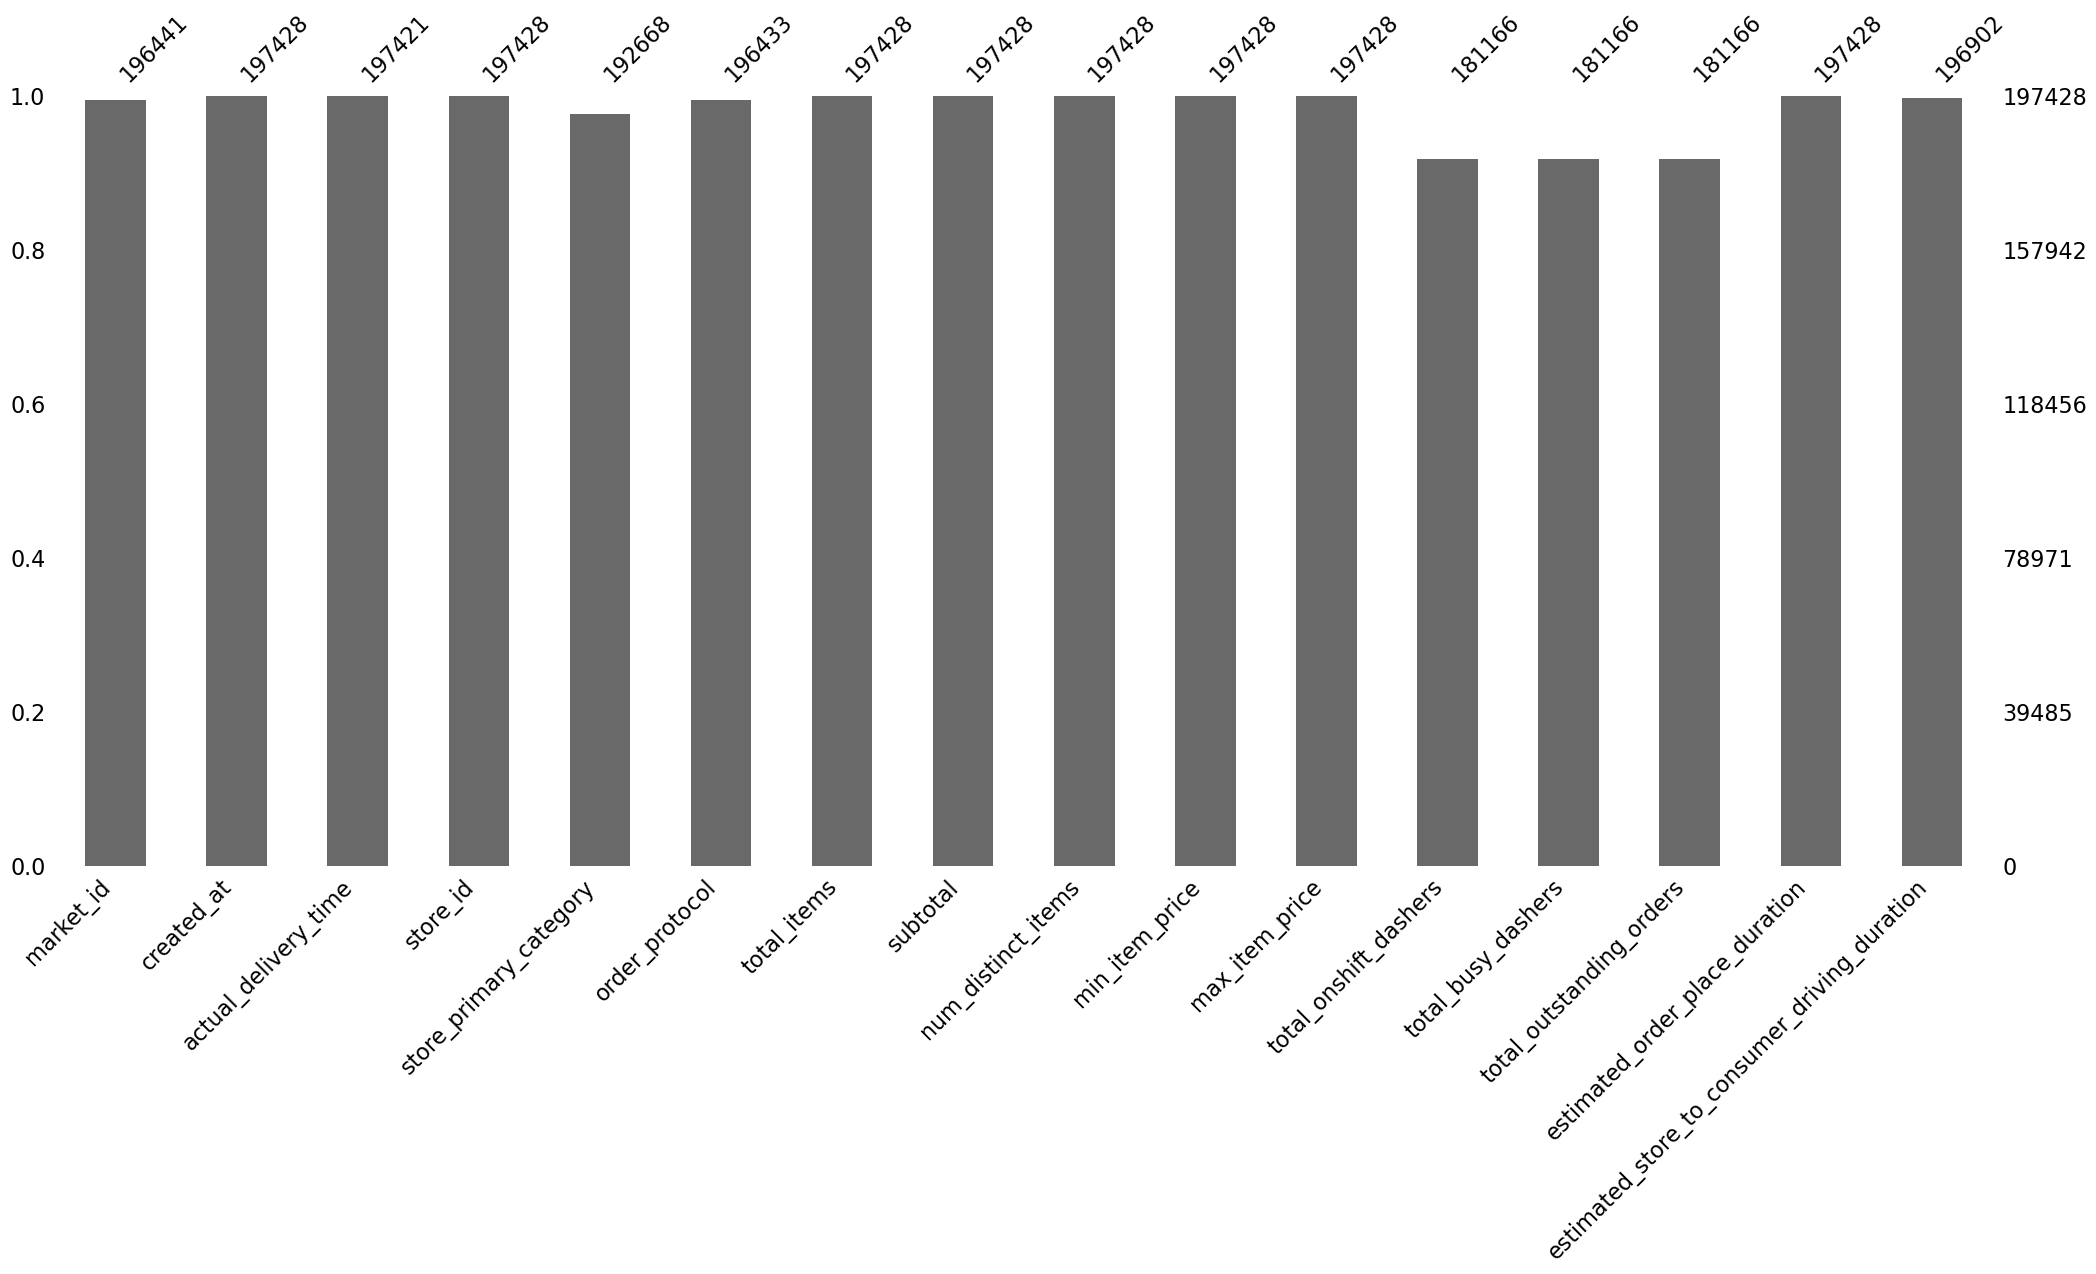

In [17]:
import missingno as msno

msno.bar(df)
plt.show()

# 3. Exploratory Data Analysis

## Splitting data before EDA

In [18]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 42, shuffle = True)

df_train.shape, df_test.shape


((177685, 16), (19743, 16))

In [19]:
df_eda = df_train.copy()
df_eda.shape

(177685, 16)

## Creating Target Feature

In [21]:
df_eda.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
93408,1.0,2015-02-02 01:29:43,2015-02-02 02:55:18,2437,japanese,4.0,2,2460,2,884,1196,30.0,28.0,55.0,251,624.0
23706,2.0,2015-02-03 00:59:52,2015-02-03 01:25:51,4657,burger,3.0,4,2206,4,229,779,42.0,42.0,61.0,251,285.0
113188,6.0,2015-02-15 05:45:52,2015-02-15 06:20:47,3835,thai,3.0,4,2360,4,275,825,NaN,NaN,NaN,251,537.0
148113,3.0,2015-02-04 03:10:02,2015-02-04 04:26:30,4368,mexican,3.0,2,2425,2,125,1595,8.0,10.0,9.0,251,936.0
154476,1.0,2015-02-10 04:54:41,2015-02-10 05:36:32,2438,pizza,3.0,3,3407,3,829,1499,29.0,32.0,35.0,251,538.0


In [23]:
df_eda['created_at'] = pd.to_datetime(df_eda['created_at'])
df_eda['actual_delivery_time'] = pd.to_datetime(df_eda['actual_delivery_time'])

df_eda['actual_delivery_time_pacific'] = (df_eda['actual_delivery_time'].dt.tz_localize('UTC')).dt.tz_convert('US/Pacific')
df_eda['created_at_pacific'] = (df_eda['created_at'].dt.tz_localize('UTC')).dt.tz_convert('US/Pacific')

df_eda.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery_time_pacific,created_at_pacific
93408,1.0,2015-02-02 01:29:43,2015-02-02 02:55:18,2437,japanese,4.0,2,2460,2,884,1196,30.0,28.0,55.0,251,624.0,2015-02-01 18:55:18-08:00,2015-02-01 17:29:43-08:00
23706,2.0,2015-02-03 00:59:52,2015-02-03 01:25:51,4657,burger,3.0,4,2206,4,229,779,42.0,42.0,61.0,251,285.0,2015-02-02 17:25:51-08:00,2015-02-02 16:59:52-08:00
113188,6.0,2015-02-15 05:45:52,2015-02-15 06:20:47,3835,thai,3.0,4,2360,4,275,825,NaN,NaN,NaN,251,537.0,2015-02-14 22:20:47-08:00,2015-02-14 21:45:52-08:00
148113,3.0,2015-02-04 03:10:02,2015-02-04 04:26:30,4368,mexican,3.0,2,2425,2,125,1595,8.0,10.0,9.0,251,936.0,2015-02-03 20:26:30-08:00,2015-02-03 19:10:02-08:00
154476,1.0,2015-02-10 04:54:41,2015-02-10 05:36:32,2438,pizza,3.0,3,3407,3,829,1499,29.0,32.0,35.0,251,538.0,2015-02-09 21:36:32-08:00,2015-02-09 20:54:41-08:00


In [26]:
df_eda['total_delivery_time_seconds'] = (df_eda['actual_delivery_time_pacific'] - df_eda['created_at_pacific']).dt.total_seconds()

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177685 entries, 93408 to 121958
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype                     
---  ------                                        --------------   -----                     
 0   market_id                                     176809 non-null  float64                   
 1   created_at                                    177685 non-null  datetime64[ns]            
 2   actual_delivery_time                          177678 non-null  datetime64[ns]            
 3   store_id                                      177685 non-null  int64                     
 4   store_primary_category                        173409 non-null  object                    
 5   order_protocol                                176786 non-null  float64                   
 6   total_items                                   177685 non-null  int64                     
 7   subtotal                      

## Univariate Analysis

In [30]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [36]:
# Correcring data types of categorical columns

df_eda['market_id'] = df_eda['market_id'].astype('object')
df_eda['order_protocol'] = df_eda['order_protocol'].astype('object')

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177685 entries, 93408 to 121958
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype                     
---  ------                                        --------------   -----                     
 0   market_id                                     176809 non-null  object                    
 1   created_at                                    177685 non-null  datetime64[ns]            
 2   actual_delivery_time                          177678 non-null  datetime64[ns]            
 3   store_id                                      177685 non-null  int64                     
 4   store_primary_category                        173409 non-null  object                    
 5   order_protocol                                176786 non-null  object                    
 6   total_items                                   177685 non-null  int64                     
 7   subtotal                      

In [39]:
df_eda_cat = df_eda.select_dtypes(include = ['object'])
df_eda_cat.head()

,market_id,store_primary_category,order_protocol
93408,1.0,japanese,4.0
23706,2.0,burger,3.0
113188,6.0,thai,3.0
148113,3.0,mexican,3.0
154476,1.0,pizza,3.0


market_id
2.0    49679
4.0    42720
1.0    34234
3.0    20922
5.0    16241
6.0    13013
Name: count, dtype: int64


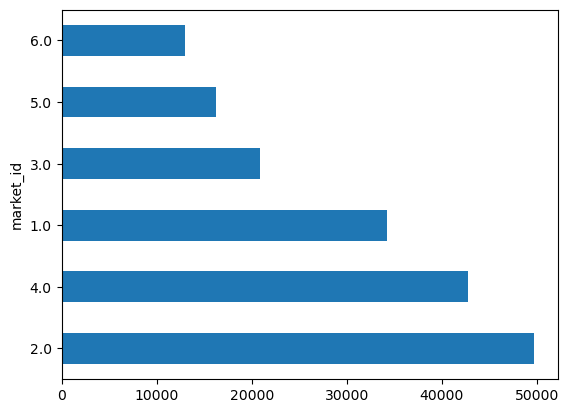

-------------------------------------------------
store_primary_category
american             17546
pizza                15617
mexican              15420
burger                9854
sandwich              9031
                     ...  
lebanese                 9
indonesian               2
belgian                  2
alcohol-plus-food        1
chocolate                1
Name: count, Length: 74, dtype: int64


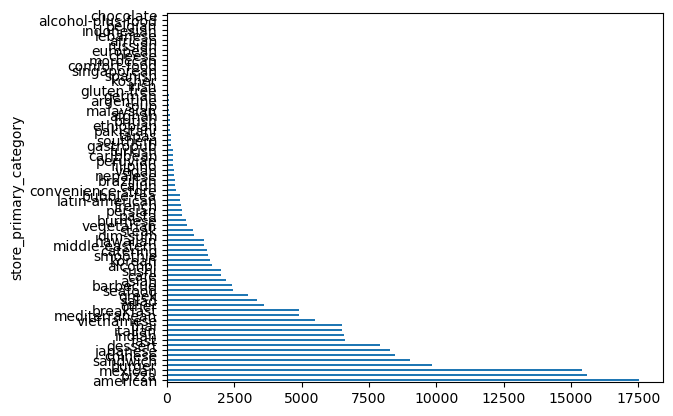

-------------------------------------------------
order_protocol
1.0    49177
3.0    47878
5.0    39904
2.0    21646
4.0    17439
6.0      725
7.0       17
Name: count, dtype: int64


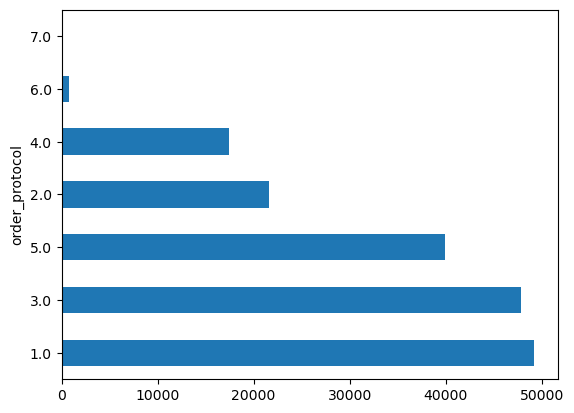

-------------------------------------------------


In [53]:
for col in df_eda_cat.columns:
    print(df_eda[col].value_counts())

    df_eda[col].value_counts().plot(kind='barh')
    plt.show()

    print('-------------------------------------------------')

In [73]:
df_eda_999 = df_eda[df_eda['total_delivery_time_seconds'] <= df_eda['total_delivery_time_seconds'].quantile(.999)]
df_eda_999.shape

(177500, 19)

<Axes: >

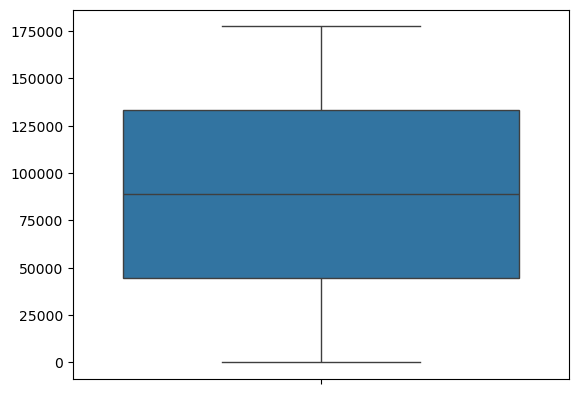

In [68]:
sns.boxplot(df_eda[df_eda['total_delivery_time_seconds'] <= df_eda['total_delivery_time_seconds'].quantile(.999)].shape)

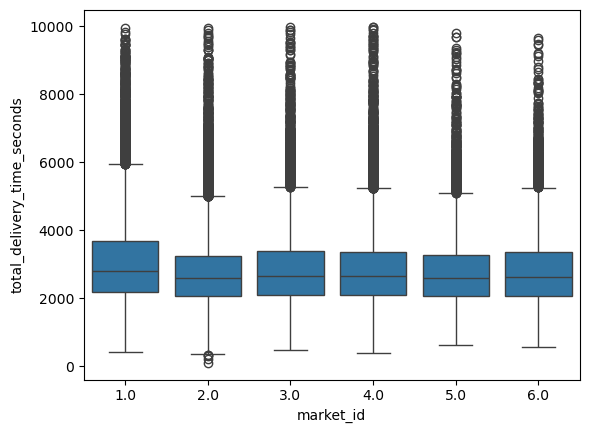

In [74]:
sns.boxplot(data = df_eda_999, x = df_eda_999['market_id'], y =  df_eda_999['total_delivery_time_seconds'])
plt.show()

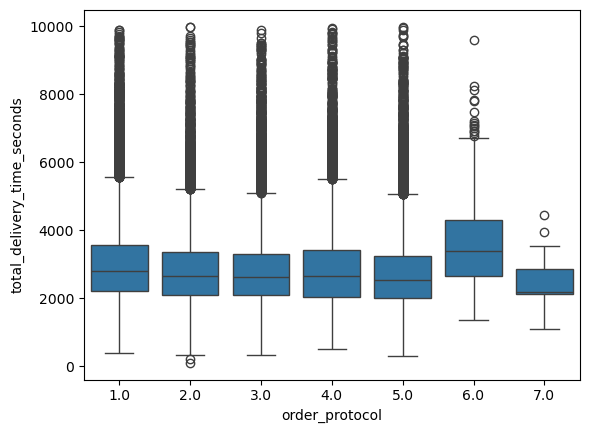

In [75]:
sns.boxplot(data = df_eda_999, x = df_eda_999['order_protocol'], y =  df_eda_999['total_delivery_time_seconds'])
plt.show()

In [81]:
df_eda_spc100 = df_eda_999['store_primary_category'].value_counts()[df_eda_999['store_primary_category'].value_counts() >= 100]

In [86]:
type(df_eda_spc100)

pandas.core.series.Series

In [88]:
list(df_eda_spc100.index)

['american',
 'pizza',
 'mexican',
 'burger',
 'sandwich',
 'chinese',
 'japanese',
 'dessert',
 'fast',
 'indian',
 'italian',
 'thai',
 'vietnamese',
 'mediterranean',
 'breakfast',
 'other',
 'salad',
 'greek',
 'seafood',
 'barbecue',
 'asian',
 'cafe',
 'sushi',
 'alcohol',
 'korean',
 'smoothie',
 'catering',
 'middle-eastern',
 'hawaiian',
 'dim-sum',
 'steak',
 'vegetarian',
 'burmese',
 'pasta',
 'persian',
 'french',
 'latin-american',
 'bubble-tea',
 'convenience-store',
 'cajun',
 'brazilian',
 'nepalese',
 'vegan',
 'filipino',
 'peruvian',
 'caribbean',
 'turkish',
 'gastropub',
 'southern',
 'tapas',
 'pakistani',
 'ethiopian',
 'british',
 'afghan']

In [91]:
df_eda_999['spc_100'] = df_eda_999['store_primary_category'].apply(lambda x : True if x in list(df_eda_spc100.index) else False)
df_eda_999['spc_100']

C:\Users\Daman\AppData\Local\Temp\ipykernel_7176\1340873977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_999['spc_100'] = df_eda_999['store_primary_category'].apply(lambda x : True if x in list(df_eda_spc100.index) else False)


93408      True
23706      True
113188     True
148113     True
154476     True
          ...  
119879    False
103694     True
131932     True
146867     True
121958     True
Name: spc_100, Length: 177500, dtype: bool

In [95]:
df_eda_999_100 = df_eda_999[df_eda_999['spc_100'] == True]

In [96]:
df_eda_999_100

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery_time_pacific,created_at_pacific,total_delivery_time_seconds,spc_100
93408,1.0,2015-02-02 01:29:43,2015-02-02 02:55:18,2437,japanese,4.0,2,2460,2,884,1196,30.0,28.0,55.0,251,624.0,2015-02-01 18:55:18-08:00,2015-02-01 17:29:43-08:00,5135.0,True
23706,2.0,2015-02-03 00:59:52,2015-02-03 01:25:51,4657,burger,3.0,4,2206,4,229,779,42.0,42.0,61.0,251,285.0,2015-02-02 17:25:51-08:00,2015-02-02 16:59:52-08:00,1559.0,True
113188,6.0,2015-02-15 05:45:52,2015-02-15 06:20:47,3835,thai,3.0,4,2360,4,275,825,NaN,NaN,NaN,251,537.0,2015-02-14 22:20:47-08:00,2015-02-14 21:45:52-08:00,2095.0,True
148113,3.0,2015-02-04 03:10:02,2015-02-04 04:26:30,4368,mexican,3.0,2,2425,2,125,1595,8.0,10.0,9.0,251,936.0,2015-02-03 20:26:30-08:00,2015-02-03 19:10:02-08:00,4588.0,True
154476,1.0,2015-02-10 04:54:41,2015-02-10 05:36:32,2438,pizza,3.0,3,3407,3,829,1499,29.0,32.0,35.0,251,538.0,2015-02-09 21:36:32-08:00,2015-02-09 20:54:41-08:00,2511.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,4.0,2015-01-31 02:12:02,2015-01-31 03:25:57,4658,seafood,3.0,3,2000,3,300,1100,84.0,72.0,138.0,251,740.0,2015-01-30 19:25:57-08:00,2015-01-30 18:12:02-08:00,4435.0,True
103694,3.0,2015-02-02 20:09:05,2015-02-02 21:25:29,386,chinese,2.0,3,4225,3,975,1025,50.0,51.0,62.0,251,833.0,2015-02-02 13:25:29-08:00,2015-02-02 12:09:05-08:00,4584.0,True
131932,2.0,2015-02-16 20:27:22,2015-02-16 21:01:46,2687,chinese,3.0,2,1790,2,895,895,51.0,49.0,78.0,251,656.0,2015-02-16 13:01:46-08:00,2015-02-16 12:27:22-08:00,2064.0,True
146867,4.0,2015-01-25 04:05:02,2015-01-25 04:43:45,3646,peruvian,3.0,1,1400,1,1400,1400,38.0,64.0,81.0,251,326.0,2015-01-24 20:43:45-08:00,2015-01-24 20:05:02-08:00,2323.0,True


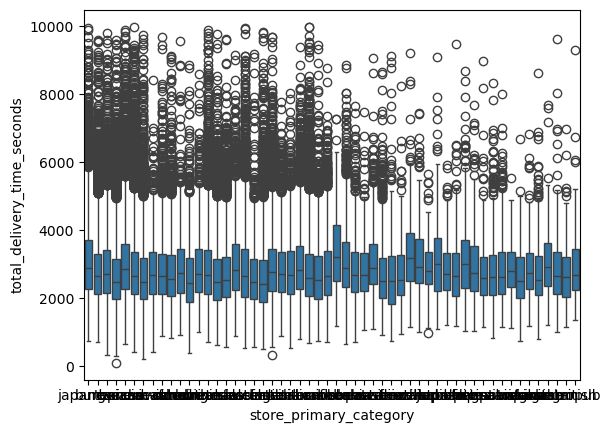

In [100]:

sns.boxplot(data = df_eda_999_100, x = df_eda_999_100['store_primary_category'], y =  df_eda_999_100['total_delivery_time_seconds'])

# plt.figure(figsize = {20,5})

plt.show()

## Bivariate Analysis

In [103]:
df_eda.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_delivery_time_pacific,created_at_pacific,total_delivery_time_seconds
93408,1.0,2015-02-02 01:29:43,2015-02-02 02:55:18,2437,japanese,4.0,2,2460,2,884,1196,30.0,28.0,55.0,251,624.0,2015-02-01 18:55:18-08:00,2015-02-01 17:29:43-08:00,5135.0
23706,2.0,2015-02-03 00:59:52,2015-02-03 01:25:51,4657,burger,3.0,4,2206,4,229,779,42.0,42.0,61.0,251,285.0,2015-02-02 17:25:51-08:00,2015-02-02 16:59:52-08:00,1559.0


In [110]:
corr_matrix = df_eda.select_dtypes(include=['number']).corr()['total_delivery_time_seconds'].sort_values(ascending = False)

corr_matrix

total_delivery_time_seconds                     1.000000
total_outstanding_orders                        0.134415
total_busy_dashers                              0.066041
total_onshift_dashers                           0.051031
estimated_store_to_consumer_driving_duration    0.011340
subtotal                                        0.010447
estimated_order_place_duration                  0.009187
max_item_price                                  0.009092
num_distinct_items                              0.006082
min_item_price                                  0.004900
total_items                                     0.004412
store_id                                       -0.000469
Name: total_delivery_time_seconds, dtype: float64

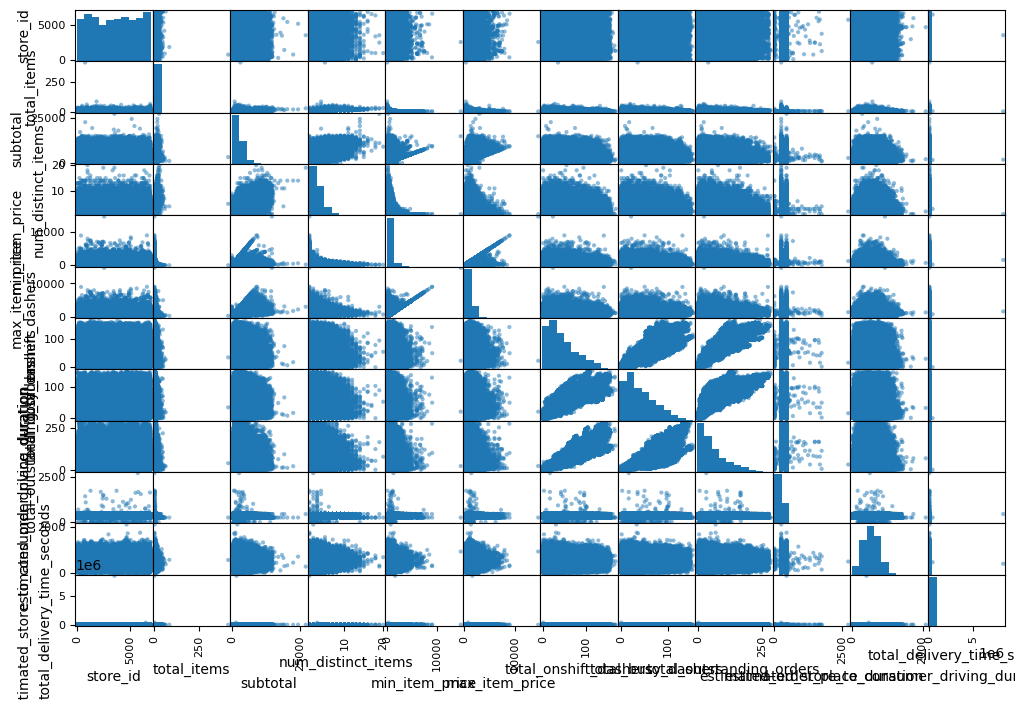

In [111]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_eda.select_dtypes(include=['number']), figsize=(12, 8))
plt.show()

## Multi-variate Analysis

## Insights

# 4. Preparing Data for Modelling

## Handling Data Types of Columns

In [114]:
df_train.shape, df_test.shape

((177685, 16), (19743, 16))

In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177685 entries, 93408 to 121958
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     176809 non-null  float64
 1   created_at                                    177685 non-null  object 
 2   actual_delivery_time                          177678 non-null  object 
 3   store_id                                      177685 non-null  int64  
 4   store_primary_category                        173409 non-null  object 
 5   order_protocol                                176786 non-null  float64
 6   total_items                                   177685 non-null  int64  
 7   subtotal                                      177685 non-null  int64  
 8   num_distinct_items                            177685 non-null  int64  
 9   min_item_price                                177

## Handling Each Column

In [144]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177685 entries, 93408 to 121958
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     176809 non-null  float64
 1   created_at                                    177685 non-null  object 
 2   actual_delivery_time                          177678 non-null  object 
 3   store_id                                      177685 non-null  int64  
 4   store_primary_category                        173409 non-null  object 
 5   order_protocol                                176786 non-null  float64
 6   total_items                                   177685 non-null  int64  
 7   subtotal                                      177685 non-null  int64  
 8   num_distinct_items                            177685 non-null  int64  
 9   min_item_price                                177

In [192]:
df_train.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

## 1. market_id, order_protocol

In [158]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [213]:
df_train.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
93408,1.0,2015-02-02 01:29:43,2015-02-02 02:55:18,2437,japanese,4.0,2,2460,2,884,1196,30.0,28.0,55.0,251,624.0
23706,2.0,2015-02-03 00:59:52,2015-02-03 01:25:51,4657,burger,3.0,4,2206,4,229,779,42.0,42.0,61.0,251,285.0
113188,6.0,2015-02-15 05:45:52,2015-02-15 06:20:47,3835,thai,3.0,4,2360,4,275,825,NaN,NaN,NaN,251,537.0
148113,3.0,2015-02-04 03:10:02,2015-02-04 04:26:30,4368,mexican,3.0,2,2425,2,125,1595,8.0,10.0,9.0,251,936.0
154476,1.0,2015-02-10 04:54:41,2015-02-10 05:36:32,2438,pizza,3.0,3,3407,3,829,1499,29.0,32.0,35.0,251,538.0


In [215]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# ========== Custom Transformer: Drop Outliers ==========
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cols, percentile=0.999):
        self.cols = cols
        self.percentile = percentile

    def fit(self, X, y=None):
        self.cutoffs = X[self.cols].quantile(self.percentile)
        return self

    def transform(self, X):
        mask = (X[self.cols] <= self.cutoffs).all(axis=1)
        return X.loc[mask].reset_index(drop=True)

# ========== Custom Transformer: Store Category Cleaner ==========
class StoreCategoryCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, store_col='store_id', category_col='store_primary_category', rare_thresh=100):
        self.store_col = store_col
        self.category_col = category_col
        self.rare_thresh = rare_thresh

    def fit(self, X, y=None):
        df = X[[self.store_col, self.category_col]].copy()
        self.most_common_per_store = (
            df.groupby(self.store_col)[self.category_col]
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'other')
        )
        value_counts = df[self.category_col].value_counts()
        self.rare_categories = set(value_counts[value_counts < self.rare_thresh].index)
        return self

    def transform(self, X):
        X_ = X.copy()
        X_[self.category_col] = X_.apply(
            lambda row: self.most_common_per_store.get(row[self.store_col], 'other')
            if pd.isna(row[self.category_col]) else row[self.category_col],
            axis=1
        )
        X_[self.category_col] = X_[self.category_col].apply(
            lambda x: 'other' if x in self.rare_categories else x
        )
        return X_[[self.category_col]]

    def get_feature_names_out(self, input_features=None):
        return [self.category_col]

# ========== Custom Transformer: DateTime Feature Extraction ==========
class DateTimeFeature(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = pd.DataFrame(X).copy()
        col = X_.columns[0]
        X_[col] = pd.to_datetime(X_[col], errors='coerce', utc=True)
        X_[f'{col}_local'] = X_[col].dt.tz_convert('US/Pacific')
        X_['is_weekend'] = (X_[f'{col}_local'].dt.dayofweek >= 5).astype(int)
        hour = X_[f'{col}_local'].dt.hour
        X_['meal_time_of_day'] = pd.cut(
            hour, bins=[-1, 4, 10, 14, 16, 21, 24],
            labels=['other', 'breakfast', 'lunch', 'other', 'dinner', 'other'],
            ordered=False
        ).astype(str)
        return X_[['is_weekend', 'meal_time_of_day']]

    def get_feature_names_out(self, input_features=None):
        return ['is_weekend', 'meal_time_of_day']

# ========== Feature Definitions ==========
num_cols = [
    'total_items', 'subtotal', 'num_distinct_items',
    'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers',
    'total_outstanding_orders'
]

# ========== Pipelines for Column Groups ==========
market_order_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

datetime_pipe = make_pipeline(
    DateTimeFeature(),
    OneHotEncoder(handle_unknown='ignore')
)

numeric_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson', standardize=True)
)

store_category_pipe = make_pipeline(
    StoreCategoryCleaner(),
    OneHotEncoder(handle_unknown='ignore')
)

# ========== Full Pipeline with ColumnTransformer ==========
preprocessing = Pipeline([
    ('outlier_remover', OutlierRemover(cols=num_cols, percentile=0.999)),
    ('column_transformer', ColumnTransformer(
        transformers=[
            ('market_order', market_order_pipe, ['market_id', 'order_protocol']),
            ('datetime', datetime_pipe, ['created_at']),
            ('numeric', numeric_pipe, num_cols),
            ('store_category', store_category_pipe, ['store_id', 'store_primary_category']),
        ],
        remainder='drop'  # Drop other columns
    ))
])

# ========== Apply on df_train ==========
df_preprocessed = preprocessing.fit_transform(df_train)

# ========== Get Feature Names ==========
column_names = preprocessing.named_steps['column_transformer'].get_feature_names_out()

# ========== Create Final DataFrame ==========
df_final = pd.DataFrame(
    df_preprocessed.toarray() if hasattr(df_preprocessed, 'toarray') else df_preprocessed,
    columns=column_names
)

# ========== Preview ==========
import IPython
IPython.display.display(df_final.head(10))  # Scrollable display in notebooks


,market_order__market_id_1.0,market_order__market_id_2.0,market_order__market_id_3.0,market_order__market_id_4.0,market_order__market_id_5.0,market_order__market_id_6.0,market_order__order_protocol_1.0,market_order__order_protocol_2.0,market_order__order_protocol_3.0,market_order__order_protocol_4.0,market_order__order_protocol_5.0,market_order__order_protocol_6.0,market_order__order_protocol_7.0,datetime__is_weekend_0,datetime__is_weekend_1,datetime__meal_time_of_day_breakfast,datetime__meal_time_of_day_dinner,datetime__meal_time_of_day_lunch,datetime__meal_time_of_day_other,numeric__total_items,numeric__subtotal,numeric__num_distinct_items,numeric__min_item_price,numeric__max_item_price,numeric__total_onshift_dashers,numeric__total_busy_dashers,numeric__total_outstanding_orders,store_category__store_primary_category_alcohol,store_category__store_primary_category_american,store_category__store_primary_category_asian,store_category__store_primary_category_barbecue,store_category__store_primary_category_brazilian,store_category__store_primary_category_breakfast,store_category__store_primary_category_british,store_category__store_primary_category_bubble-tea,store_category__store_primary_category_burger,store_category__store_primary_category_burmese,store_category__store_primary_category_cafe,store_category__store_primary_category_cajun,store_category__store_primary_category_caribbean,store_category__store_primary_category_catering,store_category__store_primary_category_chinese,store_category__store_primary_category_convenience-store,store_category__store_primary_category_dessert,store_category__store_primary_category_dim-sum,store_category__store_primary_category_fast,store_category__store_primary_category_filipino,store_category__store_primary_category_french,store_category__store_primary_category_gastropub,store_category__store_primary_category_greek,store_category__store_primary_category_hawaiian,store_category__store_primary_category_indian,store_category__store_primary_category_italian,store_category__store_primary_category_japanese,store_category__store_primary_category_korean,store_category__store_primary_category_latin-american,store_category__store_primary_category_mediterranean,store_category__store_primary_category_mexican,store_category__store_primary_category_middle-eastern,store_category__store_primary_category_nepalese,store_category__store_primary_category_other,store_category__store_primary_category_pakistani,store_category__store_primary_category_pasta,store_category__store_primary_category_persian,store_category__store_primary_category_peruvian,store_category__store_primary_category_pizza,store_category__store_primary_category_salad,store_category__store_primary_category_sandwich,store_category__store_primary_category_seafood,store_category__store_primary_category_smoothie,store_category__store_primary_category_steak,store_category__store_primary_category_sushi,store_category__store_primary_category_tapas,store_category__store_primary_category_thai,store_category__store_primary_category_turkish,store_category__store_primary_category_vegan,store_category__store_primary_category_vegetarian,store_category__store_primary_category_vietnamese
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.402351,0.115659,-0.227678,0.585127,0.236693,-0.196437,-0.190825,0.280703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.725109,-0.056627,1.004629,-0.998348,-0.674669,0.178521,0.261226,0.388371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0

In [217]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer


# ================= Custom Transformers ===================

class StoreCategoryCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, store_col='store_id', category_col='store_primary_category', rare_thresh=100):
        self.store_col = store_col
        self.category_col = category_col
        self.rare_thresh = rare_thresh

    def fit(self, X, y=None):
        df = X[[self.store_col, self.category_col]].copy()
        self.most_common_per_store = (
            df.groupby(self.store_col)[self.category_col]
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'other')
        )
        value_counts = df[self.category_col].value_counts()
        self.rare_categories = set(value_counts[value_counts < self.rare_thresh].index)
        return self

    def transform(self, X):
        X_ = X.copy()
        X_[self.category_col] = X_.apply(
            lambda row: self.most_common_per_store.get(row[self.store_col], 'other')
            if pd.isna(row[self.category_col]) else row[self.category_col],
            axis=1
        )
        X_[self.category_col] = X_[self.category_col].apply(
            lambda x: 'other' if x in self.rare_categories else x
        )
        return X_[[self.category_col]]

    def get_feature_names_out(self, input_features=None):
        return [self.category_col]


class DateTimeFeature(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = pd.DataFrame(X).copy()
        col = X_.columns[0]
        X_[col] = pd.to_datetime(X_[col], errors='coerce', utc=True)
        X_[f'{col}_local'] = X_[col].dt.tz_convert('US/Pacific')
        hour = X_[f'{col}_local'].dt.hour
        X_['is_weekend'] = (X_[f'{col}_local'].dt.dayofweek >= 5).astype(int)
        X_['meal_time_of_day'] = pd.cut(
            hour,
            bins=[-1, 4, 10, 14, 16, 21, 24],
            labels=['other', 'breakfast', 'lunch', 'other', 'dinner', 'other'],
            ordered=False
        ).astype(str)
        return X_[['is_weekend', 'meal_time_of_day']]

    def get_feature_names_out(self, input_features=None):
        return ['is_weekend', 'meal_time_of_day']


class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cols, percentile=0.999):
        self.cols = cols
        self.percentile = percentile

    def fit(self, X, y=None):
        self.thresholds = {col: np.nanpercentile(X[col], self.percentile * 100) for col in self.cols}
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in self.cols:
            X_ = X_[X_[col] <= self.thresholds[col]]
        return X_

# ================= Define Pipelines ===================

num_cols = ['total_items', 'subtotal',
            'num_distinct_items', 'min_item_price', 'max_item_price',
            'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders']

pipeline_market_order = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

datetime_pipeline = make_pipeline(
    DateTimeFeature(),
    OneHotEncoder(handle_unknown='ignore')
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson', standardize=True)
)

category_pipeline = make_pipeline(
    StoreCategoryCleaner(),
    OneHotEncoder(handle_unknown='ignore')
)

column_transformer = ColumnTransformer(
    transformers=[
        ('market_order', pipeline_market_order, ['market_id', 'order_protocol']),
        ('datetime', datetime_pipeline, ['created_at']),
        ('numeric', num_pipeline, num_cols),
        ('store_category', category_pipeline, ['store_id', 'store_primary_category'])
    ],
    remainder='drop'
)

full_pipeline = Pipeline(steps=[
    ('outlier_remover', OutlierRemover(cols=num_cols, percentile=0.999)),
    ('column_transformer', column_transformer)
])


# ================= Apply Transformations ===================

# Create target column before outlier removal
df_train['created_at'] = pd.to_datetime(df_train['created_at'], errors='coerce', utc=True)
df_train['actual_delivery_time'] = pd.to_datetime(df_train['actual_delivery_time'], errors='coerce', utc=True)
df_train['delivery_seconds'] = (df_train['actual_delivery_time'] - df_train['created_at']).dt.total_seconds()

# Remove unnecessary column
df_train_clean = df_train.drop(columns=['actual_delivery_time'])

# Apply full pipeline
df_cleaned = full_pipeline.named_steps['outlier_remover'].fit_transform(df_train_clean)
features = full_pipeline.named_steps['column_transformer'].fit_transform(df_cleaned)
feature_names = full_pipeline.named_steps['column_transformer'].get_feature_names_out()

df_final = pd.DataFrame(
    features.toarray() if hasattr(features, 'toarray') else features,
    columns=feature_names,
    index=df_cleaned.index
)

# Add target column
df_final['delivery_seconds'] = df_cleaned['delivery_seconds'].values

# Preview
print(df_final.head())


        market_order__market_id_1.0  market_order__market_id_2.0  \
93408                           1.0                          0.0   
23706                           0.0                          1.0   
148113                          0.0                          0.0   
154476                          1.0                          0.0   
33659                           0.0                          1.0   

        market_order__market_id_3.0  market_order__market_id_4.0  \
93408                           0.0                          0.0   
23706                           0.0                          0.0   
148113                          1.0                          0.0   
154476                          0.0                          0.0   
33659                           0.0                          0.0   

        market_order__market_id_5.0  market_order__market_id_6.0  \
93408                           0.0                          0.0   
23706                           0.0           

<Axes: ylabel='Frequency'>

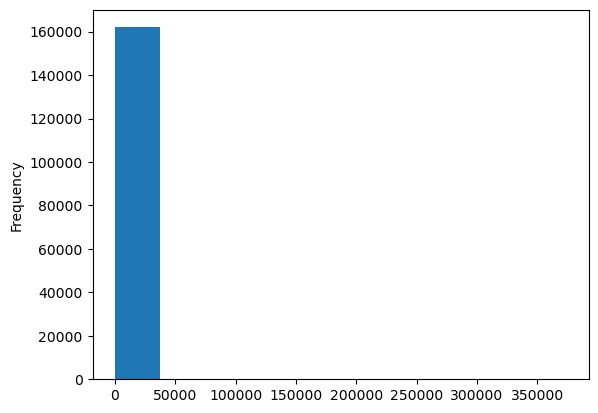

In [218]:
df_final['delivery_seconds'].plot(kind='hist')

In [222]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ========== Custom Transformers ==========

class StoreCategoryCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, store_col='store_id', category_col='store_primary_category', rare_thresh=100):
        self.store_col = store_col
        self.category_col = category_col
        self.rare_thresh = rare_thresh

    def fit(self, X, y=None):
        df = X[[self.store_col, self.category_col]].copy()
        self.most_common_per_store = (
            df.groupby(self.store_col)[self.category_col]
            .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'other')
        )
        value_counts = df[self.category_col].value_counts()
        self.rare_categories = set(value_counts[value_counts < self.rare_thresh].index)
        return self

    def transform(self, X):
        X_ = X.copy()
        X_[self.category_col] = X_.apply(
            lambda row: self.most_common_per_store.get(row[self.store_col], 'other')
            if pd.isna(row[self.category_col]) else row[self.category_col],
            axis=1
        )
        X_[self.category_col] = X_[self.category_col].apply(
            lambda x: 'other' if x in self.rare_categories else x
        )
        return X_[[self.category_col]]

    def get_feature_names_out(self, input_features=None):
        return [self.category_col]

class DateTimeFeature(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = pd.DataFrame(X).copy()
        col = X_.columns[0]
        X_[col] = pd.to_datetime(X_[col], errors='coerce', utc=True)
        X_[f'{col}_local'] = X_[col].dt.tz_convert('US/Pacific')
        hour = X_[f'{col}_local'].dt.hour
        X_['is_weekend'] = (X_[f'{col}_local'].dt.dayofweek >= 5).astype(int)
        X_['meal_time_of_day'] = pd.cut(
            hour,
            bins=[-1, 4, 10, 14, 16, 21, 24],
            labels=['other', 'breakfast', 'lunch', 'other', 'dinner', 'other'],
            ordered=False
        ).astype(str)
        return X_[['is_weekend', 'meal_time_of_day']]

    def get_feature_names_out(self, input_features=None):
        return ['is_weekend', 'meal_time_of_day']

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cols, percentile=0.999):
        self.cols = cols
        self.percentile = percentile

    def fit(self, X, y=None):
        self.thresholds = {col: np.nanpercentile(X[col], self.percentile * 100) for col in self.cols}
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in self.cols:
            X_ = X_[X_[col] <= self.thresholds[col]]
        return X_

# ========== Pipelines ==========

num_cols = ['total_items', 'subtotal',
            'num_distinct_items', 'min_item_price', 'max_item_price',
            'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders']

pipeline_market_order = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

datetime_pipeline = make_pipeline(
    DateTimeFeature(),
    OneHotEncoder(handle_unknown='ignore')
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson', standardize=True)
)

category_pipeline = make_pipeline(
    StoreCategoryCleaner(),
    OneHotEncoder(handle_unknown='ignore')
)

column_transformer = ColumnTransformer(
    transformers=[
        ('market_order', pipeline_market_order, ['market_id', 'order_protocol']),
        ('datetime', datetime_pipeline, ['created_at']),
        ('numeric', num_pipeline, num_cols),
        ('store_category', category_pipeline, ['store_id', 'store_primary_category'])
    ],
    remainder='drop'
)

full_pipeline = Pipeline(steps=[
    ('outlier_remover', OutlierRemover(cols=num_cols, percentile=0.999)),
    ('column_transformer', column_transformer)
])

# ========== Data Preparation ==========

# Create target column
df_train['created_at'] = pd.to_datetime(df_train['created_at'], errors='coerce', utc=True)
df_train['actual_delivery_time'] = pd.to_datetime(df_train['actual_delivery_time'], errors='coerce', utc=True)
df_train['delivery_seconds'] = (df_train['actual_delivery_time'] - df_train['created_at']).dt.total_seconds()

# Remove rows with null delivery_seconds
df_train = df_train[df_train['delivery_seconds'].notna()]

# Drop unneeded column
df_train_clean = df_train.drop(columns=['actual_delivery_time'])

# Apply outlier removal first
df_cleaned = full_pipeline.named_steps['outlier_remover'].fit_transform(df_train_clean)

# Create X and y
X = df_cleaned.drop(columns=['delivery_seconds'])
y = df_cleaned['delivery_seconds']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit transformer on train only
X_train_transformed = full_pipeline.named_steps['column_transformer'].fit_transform(X_train)
X_test_transformed = full_pipeline.named_steps['column_transformer'].transform(X_test)
feature_names = full_pipeline.named_steps['column_transformer'].get_feature_names_out()


# Convert to dense DataFrame with column names
X_train_df = pd.DataFrame(
    X_train_transformed.toarray(),  # convert sparse to dense
    columns=feature_names,
    index=X_train.index
)

print(X_train_df.head())




        market_order__market_id_1.0  market_order__market_id_2.0  \
130460                          1.0                          0.0   
185674                          0.0                          0.0   
5884                            0.0                          0.0   
39397                           0.0                          0.0   
76745                           0.0                          1.0   

        market_order__market_id_3.0  market_order__market_id_4.0  \
130460                          0.0                          0.0   
185674                          0.0                          1.0   
5884                            0.0                          0.0   
39397                           1.0                          0.0   
76745                           0.0                          0.0   

        market_order__market_id_5.0  market_order__market_id_6.0  \
130460                          0.0                          0.0   
185674                          0.0           

In [ ]:
X_train_df = pd.DataFrame(
    X_train_transformed.toarray(),  # convert sparse to dense
    columns=feature_names,
    index=X_train.index
)

In [224]:
X_train_transformed.shape, y_train.shape

((129600, 76), (129600,))

In [225]:
# ========== Model Training ==========

model = RandomForestRegressor(random_state=42)

model.fit(X_train_transformed, y_train)


RandomForestRegressor(random_state=42)

In [231]:
model2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,              # limit tree depth
    min_samples_leaf=10,       # require more samples per leaf
    max_features='sqrt',       # fewer features per split
    random_state=42
)

model2.fit(X_train_transformed, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      random_state=42)

In [226]:
# ========== Evaluation ==========

y_pred = model.predict(X_train_transformed)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)

print(f"MAE: {mae:.2f} seconds")
print(f"RMSE: {rmse:.2f} seconds")
print(f"R²: {r2:.4f}")

MAE: 264.50 seconds
RMSE: 539.84 seconds
R²: 0.8814


In [232]:
# ========== Evaluation ==========

y_pred = model2.predict(X_train_transformed)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)

print(f"MAE: {mae:.2f} seconds")
print(f"RMSE: {rmse:.2f} seconds")
print(f"R²: {r2:.4f}")

MAE: 745.97 seconds
RMSE: 1475.11 seconds
R²: 0.1147


In [233]:
# ========== Evaluation Test ==========

y_pred_test = model2.predict(X_test_transformed)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae:.2f} seconds")
print(f"RMSE: {rmse:.2f} seconds")
print(f"R²: {r2:.4f}")

MAE: 742.91 seconds
RMSE: 1026.97 seconds
R²: 0.1442


In [227]:
X_test_transformed.shape, y_test.shape

((32400, 76), (32400,))

In [228]:
# ========== Evaluation Test ==========

y_pred_test = model.predict(X_test_transformed)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae:.2f} seconds")
print(f"RMSE: {rmse:.2f} seconds")
print(f"R²: {r2:.4f}")

MAE: 702.38 seconds
RMSE: 987.33 seconds
R²: 0.2090


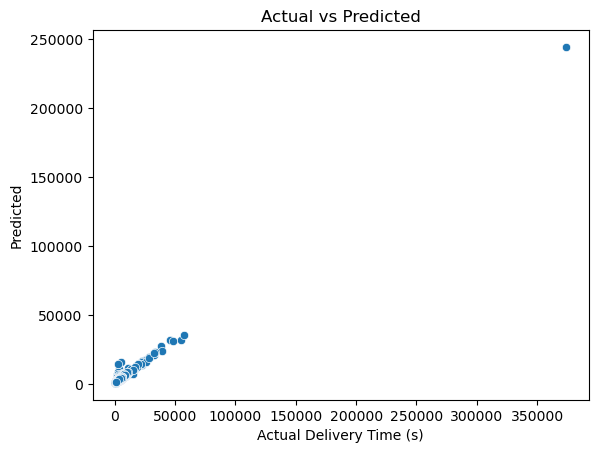

In [230]:
y_pred = model.predict(X_train_transformed)
sns.scatterplot(x=y_train, y=y_pred)
plt.xlabel("Actual Delivery Time (s)")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


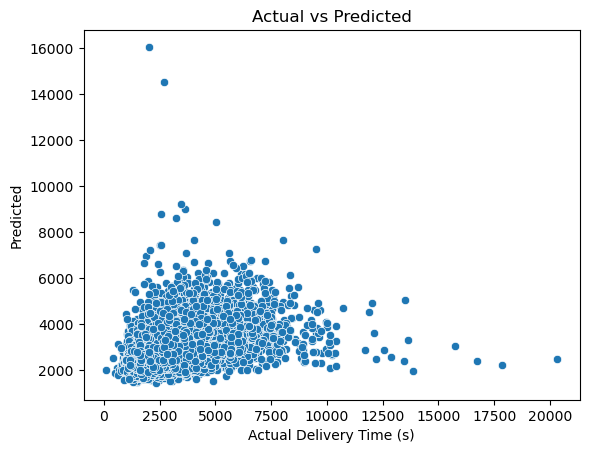

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test_transformed)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Delivery Time (s)")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


## Handling the Missing Values

## Handling Categorical Columns

## Handling Outliers

## Feature Engineering

## Column Transformations - Box-Cox; Yeo-Johnson

# 5. Building Models, Evaluation

## Building Models

## Evaluation Using Cross-Validation

## Feature Importance, Selection, Feature Correlation, Remodelling

## Regularization, Polynomial Features

## Statistical Significance of the Model & Features

# 6. Hyperparameter Tuning

# 7. Performance Metrics Evaluation for Test Data